<a href="https://colab.research.google.com/github/lorenzotomada/Applied_Mathematics/blob/main/Code/AM_lab8_and_lab9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Eigenvalue and eigenvectors calculation

$$
A\mathbf{x} = \lambda \mathbf{x}
$$

### Power method (vector iteration)
- find the largest eigenvalue $\lambda_{max}$
\begin{align}
\mathbf{q}_k & = \frac{\mathbf{z}_{k-1}}{\|\mathbf{z}_{k-1}\|_2}\\
\mathbf{z}_k & = A\mathbf{q}_{k}\\
\lambda_{max}^k & = \mathbf{q}^T_k \mathbf{z}_k
\end{align}

In [15]:
%matplotlib inline
from numpy import *
from matplotlib.pyplot import *
import numpy.linalg
import scipy.linalg

n = 9
h = 1./(n-1)

x=linspace(0,1,n)

a = -ones((n-1,))
b = 2*ones((n,))
A = (diag(a, -1) + diag(b, 0) + diag(a, +1))

A /= h**2

#print A

z0 = ones_like(x)

In [16]:
def PM(A,z0,tol=1e-5,nmax=500):
    q = z0/numpy.linalg.norm(z0,2)
    it = 0
    err = tol + 1. # As usual, to enter the loop
    while it < nmax and err > tol:
        z = dot(A,q)
        l = dot(q.T,z)
        err = numpy.linalg.norm(z-l*q,2)
        q = z/numpy.linalg.norm(z,2)

        it += 1
    print("error =", err, "iterations =", it)
    print("lambda_max =", l)
    return l,q

In [17]:
l,x = PM(A,z0)

l_np, x_np = numpy.linalg.eig(A)

print("numpy")
print(l_np)

error = 8.456086477502974e-06 iterations = 82
lambda_max = 249.7352340857781
numpy
[249.73523409 231.55417528 203.23651229 167.55417528 128.
   6.26476591  24.44582472  88.44582472  52.76348771]


### Inverse power method
- find the eigenvalue $\lambda$ **closest** to $\mu$
\begin{align}
M & = A-\mu I\\
M & = LU \\
& \\
M\mathbf{x}_k &= \mathbf q_{k-1}\\
\mathbf{q}_k & = \frac{\mathbf{x}_k}{\|\mathbf{x}_k\|_2}\\
\mathbf{z}_k & = A\mathbf{q}_{k}\\
\lambda^k & = \mathbf{q}^T_k \mathbf{z}_k
\end{align}


In [18]:
def IPM(A,x0,mu,tol=1e-5,nmax=500):
  it = 0
  err = tol + 1.
  M = A - mu*eye(len(A))
  P, L, U = scipy.linalg.lu(M) # .inv usually not usable for matrices in high dimension.
  # If the matrix is not sparse, too big... Maybe issues with ill-conditioning...
  # In this case it would work
  q = x0/numpy.linalg.norm(x0,2)
  while it < nmax and err > tol:
    y = np.linalg.solve(L, dot(P.T, q))
    x = np.linalg.solve(U, y)
    q = x/numpy.linalg.norm(x,2)
    z = dot(A,q)
    l = dot(q.T,z)
    err = numpy.linalg.norm(z-l*q,2)
    it += 1
  print("error =", err, "iterations =", it)
  print("lambda_max =", l)
  return l, q

In [19]:
%time l,x = IPM(A,z0,6.)

error = 2.6310164583190105e-06 iterations = 3
lambda_max = 6.264765914220488
CPU times: user 3.01 ms, sys: 0 ns, total: 3.01 ms
Wall time: 4.78 ms


# Ordinary differential equations

Consider the linear Cauchy model
\begin{equation*}
\begin{cases}
y'(t) = \lambda y(t)\\
y(0)=1
\end{cases}
\end{equation*}
whose exact solution is $y(t) = e^{\lambda t}$.

In [20]:
from numpy import *

In [21]:
l = -5.
t0 = 0.
tf = 10.
y0 = 1.
s = linspace(t0, tf, 5000)

exact = lambda x: exp(l*x)

##Forward Euler method
\begin{equation}
\frac{y_{n}-y_{n-1}}{h} = f(t_{n-1}, y_{n-1})
\end{equation}

In [22]:
def fe(l, y0, t0, tf, h): # inputs: lambda, initial condition, initial time, final time, timestep
  timesteps = arange(t0, tf +1e-10, h)
  sol = zeros_like(timesteps)
  sol[0] = y0
  for i in range(1, len(sol)):
    sol[i] = sol[i-1]*(1+l*h)
  return sol, timesteps

0.21160539552547342


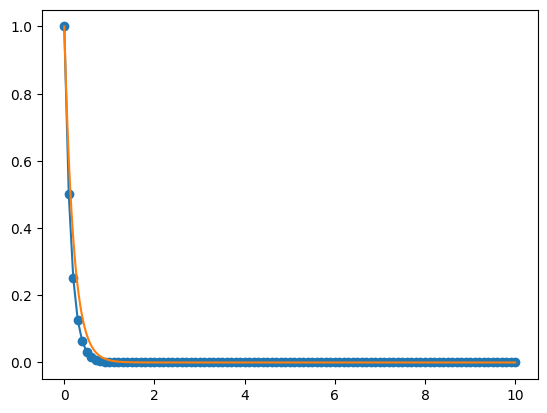

In [23]:
y, t = fe(l,y0, t0, tf, 0.1)

_ = plot(t,y,'o-')
_ = plot(s,exact(s))

error = numpy.linalg.norm(exact(t) -y, 2)
print(error)

Now, let us try to increase the stepsize and see what happens:

5.025640576524351


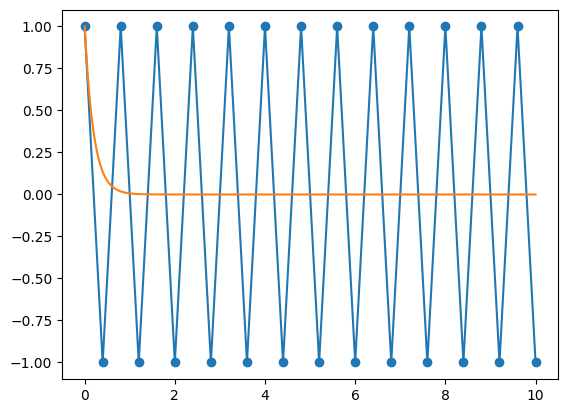

In [24]:
y, t = fe(l,y0, t0, tf, 0.4)

_ = plot(t,y,'o-')
_ = plot(s,exact(s))

error = numpy.linalg.norm(exact(t) -y, 2)
print(error)

We can see a lot  of obscillations as $h$ increases.
For instance, while not being an optimal situation, for $h=0.3$ at least the obscillations are dumped.

$0.4$ is the threshold over which they are amplified, hence any value larger than that will lead to meaningless results (for $h = 0.4$, obscillations are neither amplified nor dumped, we have unphysical obscillations, but the stability of the solution is  preserved).

Indeed, for the explicit Euler method,
\begin{equation*}
\frac{y_n -y_{n-1}}{h} = \lambda y_{n-1}
\end{equation*}
hence, manipulating a little bit,
\begin{equation*}
y_n = (1+h\lambda)y_{n-1},
\end{equation*}
from which we get that
\begin{equation*}
y_n = (1+h\lambda)^ny_{0}.
\end{equation*}
Therefore, to achieve the condition
\begin{equation*}
\lim_{n\rightarrow\infty} y_n = 0,
\end{equation*}
we need to have $|1+h\lambda| < 1$, which is a really restrictive condition on $h$ if $\lambda\ll 0$.

Indeed, the equation we are considering is the propotype of stiff equations (and it is often reffered at as the _scalar test equation_) and the Euler method, being explicit, has a bounded stability region.

Unlike the case of A-stable methods, the stepsize $h$ does not only have implication on the size of the local error, but also on stability!

##Backward Euler method
\begin{equation}
\frac{y_{n}-y_{n-1}}{h} = f(t_{n}, y_{n})
\end{equation}

Here we need to solve a (potentially, but not in our case) non-linear system!

But the additional computational cost is compensated by the fact that stability is unconditional for the backward Euler method.  

1) exercise on interpolation
2) relative and absolute cond. number
3) discetization of PDEs (derivare eg 4-th order, forward, backward.... using eg unknown coeff. method). Also  solve resulting linear systems using direct methods etc
4) Connect PDEs with ODEs, time dep PDE. t and x.In that case, eg forward Euler method, eg FD for partial derivatives...

In [25]:
def be(l, y0, t0, tf, h): # inputs: lambda, initial condition, initial time, final time, timestep
  timesteps = arange(t0, tf +1e-10, h)
  sol = zeros_like(timesteps)
  sol[0] = y0
  for i in range(1, len(sol)):
    sol[i] = sol[i-1]/(1-l*h)
  return sol, timesteps

0.16238326014548532


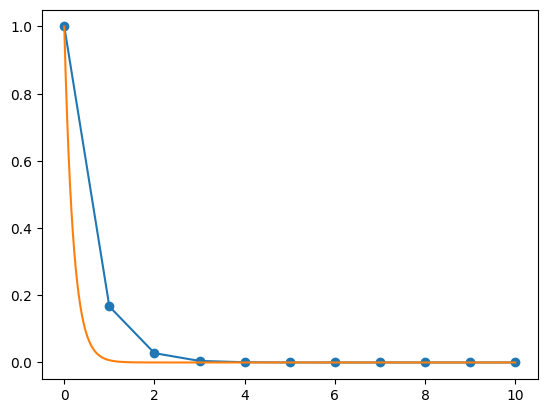

In [26]:
y, t = be(l,y0, t0, tf, 1)

_ = plot(t,y,'o-')
_ = plot(s,exact(s))

error = numpy.linalg.norm(exact(t) -y, 2)
print(error)